In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
estado = pd.read_csv("perfil_eleitor_secao_ATUAL_SP.csv", 
                 usecols = '''NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL NR_ZONA'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')

In [3]:
municipio.sample(30)

,NR_ZONA,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
13644687,127,CASADO,60 a 64 anos,LÊ E ESCREVE,2,0
7317324,412,SEPARADO JUDICIALMENTE,40 a 44 anos,ENSINO MÉDIO COMPLETO,1,0
15947255,412,CASADO,65 a 69 anos,SUPERIOR COMPLETO,3,0
7957952,282,SOLTEIRO,55 a 59 anos,ENSINO FUNDAMENTAL INCOMPLETO,3,0
15982095,412,CASADO,75 a 79 anos,ENSINO FUNDAMENTAL INCOMPLETO,3,0
6273739,412,CASADO,65 a 69 anos,SUPERIOR INCOMPLETO,2,0
15743339,411,CASADO,75 a 79 anos,SUPERIOR COMPLETO,1,0
8381472,411,CASADO,40 a 44 anos,ENSINO FUNDAMENTAL INCOMPLETO,2,0
10496180,411,CASADO,60 a 64 anos,ENSINO FUNDAMENTAL INCOMPLETO,3,0
6951935,282,SOLTEIRO,35 a 39 anos,ENSINO MÉDIO INCOMPLETO,1,0


In [4]:
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

DS_FAIXA_ETARIA
100 anos ou mais        5
16 anos               213
17 anos              2398
18 anos              5151
19 anos              7731
20 anos              8501
21 a 24 anos        39460
25 a 29 anos        51110
30 a 34 anos        52800
35 a 39 anos        56795
40 a 44 anos        60465
45 a 49 anos        51610
50 a 54 anos        45491
55 a 59 anos        42375
60 a 64 anos        37651
65 a 69 anos        31347
70 a 74 anos        21836
75 a 79 anos        10712
80 a 84 anos         4180
85 a 89 anos         1394
90 a 94 anos          357
95 a 99 anos           68
Inválido                8
Name: QT_ELEITORES_PERFIL, dtype: int64

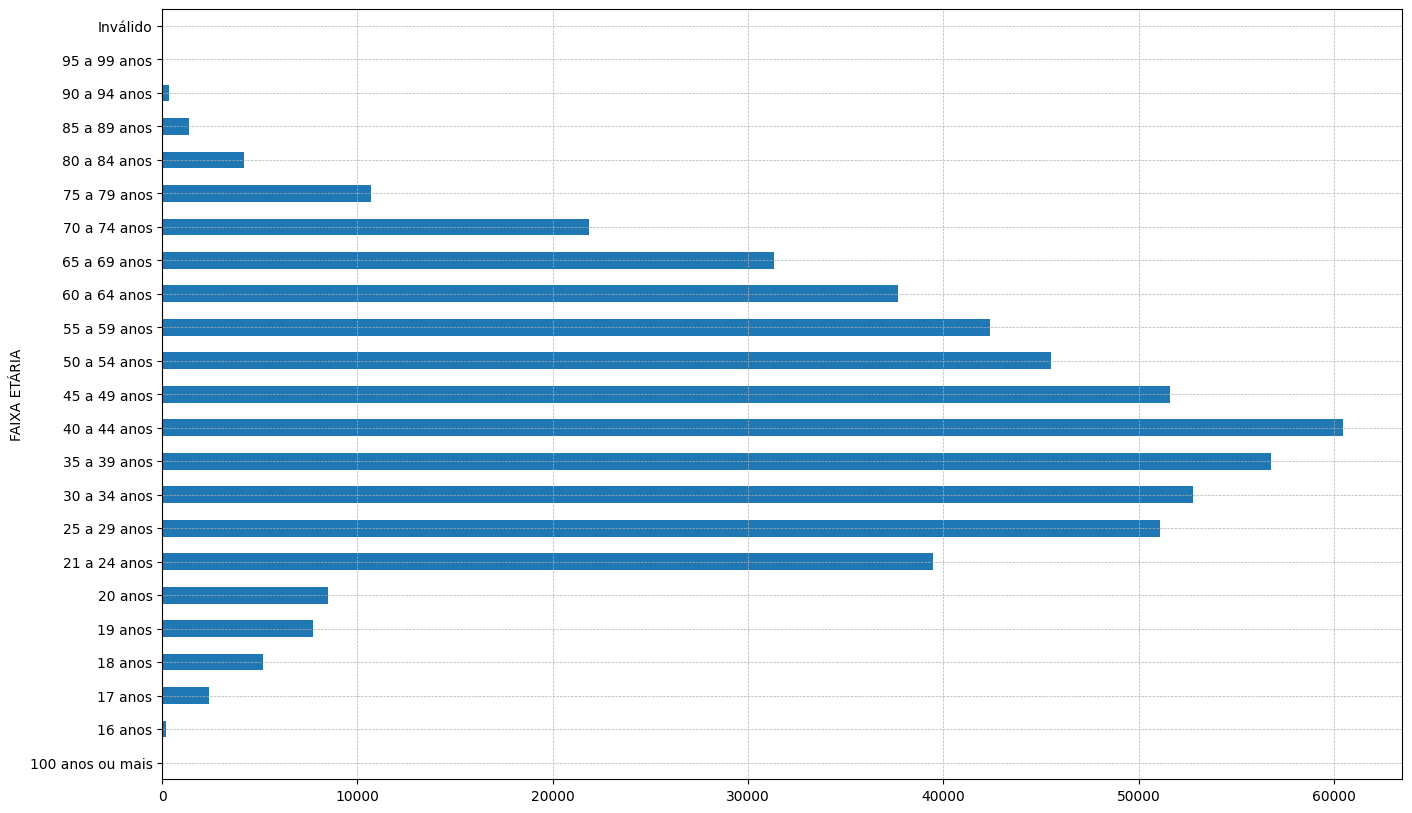

In [5]:
FaixaEtaria.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.5)

In [6]:
Jovem = FaixaEtaria[1:8] 
Adulto = FaixaEtaria[8:14] 
Idoso = FaixaEtaria[14:22] 

In [7]:
FaixasIdade = pd.DataFrame({'São José dos Campos':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade

,São José dos Campos
Jovens até 29 anos,114564
Adultos,309536
Idosos a partir de 60,107550


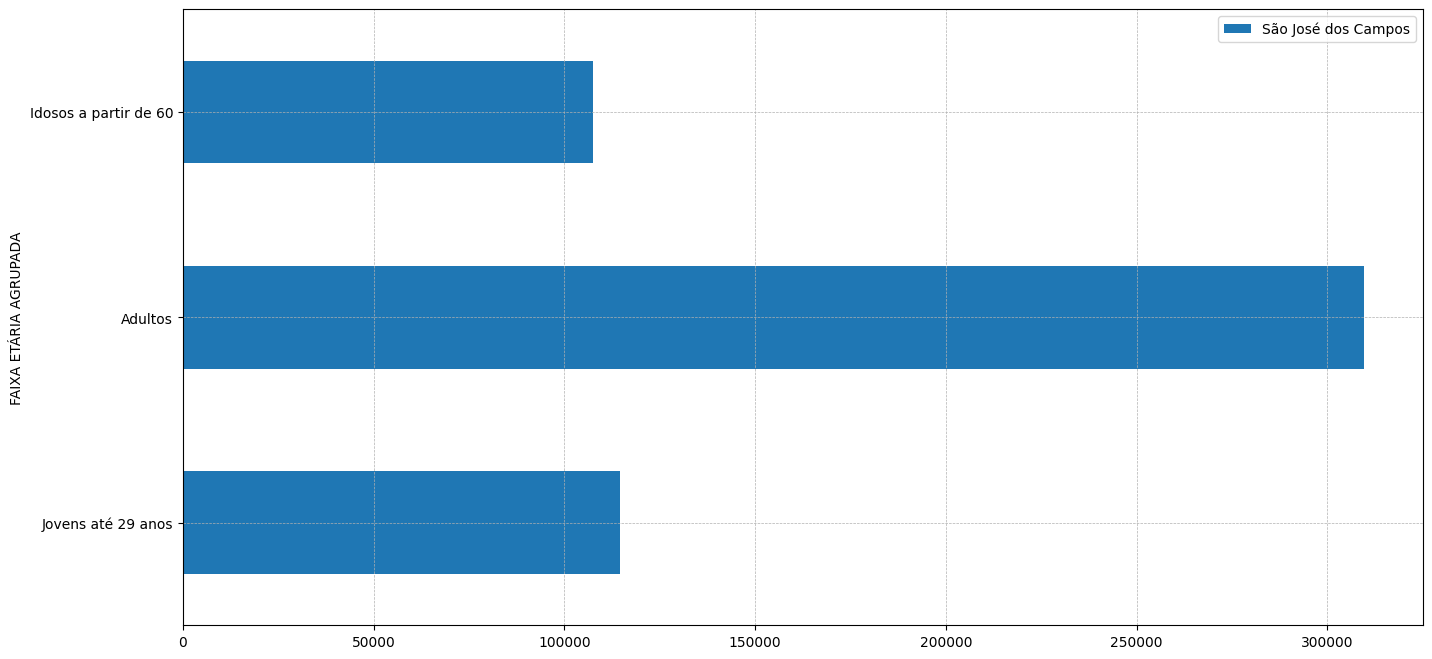

In [8]:
FaixasIdade.plot(kind='barh', figsize=(16,8))
plt.ylabel('FAIXA ETÁRIA AGRUPADA')
plt.grid(linestyle = '--', linewidth = 0.5)

In [9]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    print (f'Zona eleitoral {zona}: {jovens[zona]}')

Zona eleitoral 412: 38554
Zona eleitoral 411: 31331
Zona eleitoral 127: 26846
Zona eleitoral 282: 17833


In [10]:
idosos = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

Zona eleitoral 412: 35118
Zona eleitoral 127: 31109
Zona eleitoral 411: 25822
Zona eleitoral 282: 15501


In [11]:
EstadoCivil = municipio.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)
EstadoCivil

DS_ESTADO_CIVIL
SOLTEIRO                  237930
CASADO                    236200
DIVORCIADO                 34505
VIÚVO                      15088
SEPARADO JUDICIALMENTE      7934
NÃO INFORMADO                  1
Name: QT_ELEITORES_PERFIL, dtype: int64

In [12]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
Escolaridade

DS_GRAU_ESCOLARIDADE
ENSINO MÉDIO COMPLETO            210459
SUPERIOR COMPLETO                116530
ENSINO FUNDAMENTAL INCOMPLETO     67251
ENSINO MÉDIO INCOMPLETO           56561
SUPERIOR INCOMPLETO               35650
ENSINO FUNDAMENTAL COMPLETO       34452
LÊ E ESCREVE                       6892
ANALFABETO                         3863
Name: QT_ELEITORES_PERFIL, dtype: int64

In [13]:
FaixasIdade.to_csv('FaixasIdade.csv')
EstadoCivil.to_csv('EstadoCivil.csv')
Escolaridade.to_csv('Escolaridade.csv')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
estado = pd.read_csv("bweb_1t_SP_051020221321.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS" and DS_CARGO_PERGUNTA == "Presidente"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO DS_CARGO_PERGUNTA'.split())

In [16]:
municipio.sample(30)

,NR_ZONA,NR_SECAO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
4312556,127,663,387,315,72,12,CIRO GOMES,11
18041066,411,135,381,289,92,80,LÉO PÉRICLES,1
4313711,127,669,410,347,63,44,SORAYA THRONICKE,2
10593645,282,111,383,319,64,21,SOFIA MANZANO,1
18044819,411,156,272,190,82,95,Branco,5
10598972,282,141,284,229,55,14,PADRE KELMON,1
18106466,412,79,385,300,85,30,FELIPE D'AVILA,4
4261613,127,138,334,254,80,14,PADRE KELMON,1
18069979,411,290,413,318,95,44,SORAYA THRONICKE,2
4299181,127,590,377,290,87,12,CIRO GOMES,9


In [17]:
municipio.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending = False)

NM_VOTAVEL
JAIR BOLSONARO         233683
LULA                   143732
SIMONE TEBET            28467
CIRO GOMES              14177
Nulo                    11572
Branco                   7745
FELIPE D'AVILA           4513
SORAYA THRONICKE         2254
LÉO PÉRICLES              301
SOFIA MANZANO             274
VERA                      270
PADRE KELMON              263
CONSTITUINTE EYMAEL        84
Name: QT_VOTOS, dtype: int64

In [18]:
votacao = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
    total = sum(result)
    votacao[zona] = {'Jair Bolsonaro': round(result["JAIR BOLSONARO"] / total * 100, 1),
                     'Lula': round(result["LULA"] / total * 100, 1), 
                     'Simone Tebet': round(result['SIMONE TEBET'] / total * 100, 1),
                     'Nulos':round(result['Nulo'] / total * 100, 1), 
                     'Brancos':round(result['Branco'] / total * 100, 1)
                    }
votacao = pd.DataFrame(votacao).transpose()
votacao

,Jair Bolsonaro,Lula,Simone Tebet,Nulos,Brancos
127,53.3,30.3,7.4,2.1,1.4
282,49.6,34.9,6.3,2.8,2.1
411,49.6,35.5,5.6,2.8,1.9
412,54.7,29.7,6.2,2.7,1.7


In [19]:
votacao['Jair Bolsonaro'].sort_values(ascending = False)

412    54.7
127    53.3
282    49.6
411    49.6
Name: Jair Bolsonaro, dtype: float64

In [20]:
votacao['Lula'].sort_values(ascending = False)

411    35.5
282    34.9
127    30.3
412    29.7
Name: Lula, dtype: float64

In [21]:
print (f"Porcentagem de ausencia: {municipio['QT_ABSTENCOES'].sum()/municipio['QT_APTOS'].sum()*100:.2f}%")

Porcentagem de ausencia: 19.89%
